# Kaggle Machine Learning Competition: Predicting Titanic Survivors

# Competition Site
Description, Evaluation, and Data Set taken from the competition site.

# Description
The sinking of the RMS Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

# Evaluation
The historical data has been split into two groups, a 'training set' and a 'test set'. For the training set, we provide the outcome ( 'ground truth' ) for each passenger. You will use this set to build your model to generate predictions for the test set.

For each passenger in the test set, you must predict whether or not they survived the sinking ( 0 for deceased, 1 for survived ). Your score is the percentage of passengers you correctly predict.

The Kaggle leaderboard has a public and private component. 50% of your predictions for the test set have been randomly assigned to the public leaderboard ( the same 50% for all users ). Your score on this public portion is what will appear on the leaderboard. At the end of the contest, we will reveal your score on the private 50% of the data, which will determine the final winner. This method prevents users from 'overfitting' to the leaderboard.

# Agenda of the notebook

## 1. Importing required libraries 
## 2. Acquiring the data
## 3. Exaploratory Data Analysis
## 4. Wranglong and Preprocessing the data
## 5. Modeling and predicting the output

# Variable	Definition
------------------------------
#### survival --->	 Survival	----  0 = Not Survived , 1 = Survived
#### pclass	--->   Ticket class	
#### sex	 --->    Sex	
#### Age	 --->  Age in years	
#### sibsp --->   # of siblings / spouses aboard the Titanic	
#### parch --->   # of parents / children aboard the Titanic	
#### ticket  --->   Ticket number	
#### fare  --->    Passenger fare	
#### cabin  --->	  Cabin number	
#### embarked  --->	 Port of Embarkation ----	C = Cherbourg, Q = Queenstown, S = Southampton

# 1. Importing required libraries

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

# preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# machine learning Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

#f1_score
from sklearn.metrics import f1_score

# 2. Acquiring the data

In [2]:
# reading training and testing data
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 3. Exaploratory Data Analysis

## 3.1 Analyzing the data using description methods

In [4]:
# columns of training data
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
# printing the shapes of the data
print("Training data shape: ",train_df.shape)
print("Testing data shape: ",test_df.shape)

Training data shape:  (891, 12)
Testing data shape:  (418, 11)


In [6]:
# a useful information about the training data as number of not null values and features data types
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
# a useful information about the testing data as number of not null values and features data types
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [8]:
print('Percentage of NAN Values in training data Befor wrangling the data')
print('--------')
print((train_df.isna().sum()/len(train_df)*100).sort_values(ascending=False))

Percentage of NAN Values in training data Befor wrangling the data
--------
Cabin          77.104377
Age            19.865320
Embarked        0.224467
PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
dtype: float64


In [9]:
print('Percentage of NAN Values in testing data Befor wrangling the data')
print('--------')
print((test_df.isna().sum()/len(test_df)*100).sort_values(ascending=False))

Percentage of NAN Values in testing data Befor wrangling the data
--------
Cabin          78.229665
Age            20.574163
Fare            0.239234
PassengerId     0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Embarked        0.000000
dtype: float64


In [10]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [12]:
print('Unique values: ')
print('--------')
print(train_df.nunique().sort_values())

Unique values: 
--------
Survived         2
Sex              2
Pclass           3
Embarked         3
SibSp            7
Parch            7
Age             88
Cabin          147
Fare           248
Ticket         681
PassengerId    891
Name           891
dtype: int64


In [13]:
# the percentage of survived and not survived
train_df['Survived'].value_counts(normalize=True).to_frame()

,Survived
0,0.616162
1,0.383838


In [14]:
# the percentage of Embarkation ports types
train_df['Embarked'].value_counts(normalize=True).to_frame()

,Embarked
S,0.724409
C,0.188976
Q,0.086614


In [15]:
# the percentage of male and female genders
train_df['Sex'].value_counts(normalize=True)

male      0.647587
female    0.352413
Name: Sex, dtype: float64

In [16]:
# the percentage of survived females and survived males
train_df.groupby(['Sex'])["Survived"].mean().to_frame()

,Survived
Sex,
female,0.742038
male,0.188908


## 3.2 Visualizing the data

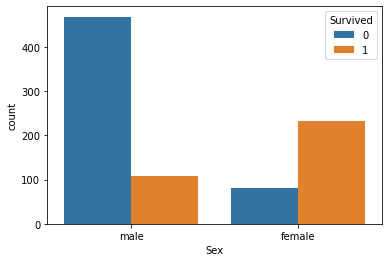

In [17]:
sns.countplot(data=train_df,x = 'Sex',hue='Survived')
plt.show()

In [18]:
 train_df.groupby(['Sex','Survived'])['Survived'].count().to_frame()

Survived
Sex    Survived          
female 0               81
       1              233
male   0              468
       1              109

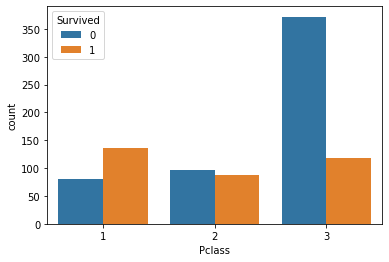

In [19]:
sns.countplot(data=train_df,x = 'Pclass',hue='Survived')
plt.show()

In [20]:
# the percentage of survived w.r.t each class
train_df.groupby(['Pclass'])["Survived"].mean().to_frame()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [21]:
# the percentage of survived w.r.t each embarkation
train_df.groupby(['Embarked'])["Survived"].mean().to_frame()

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


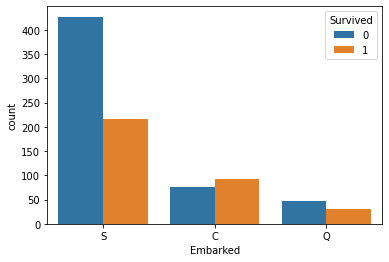

In [22]:
sns.countplot(data=train_df,x = 'Embarked',hue='Survived')
plt.show()

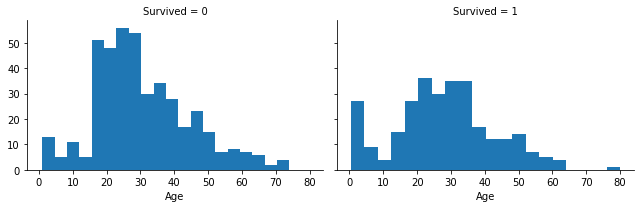

In [23]:
# histogram of age distribuation w.r.t survived
g = sns.FacetGrid(train_df, col='Survived', height=3, aspect=1.5)
g.map(plt.hist, 'Age', bins=20)

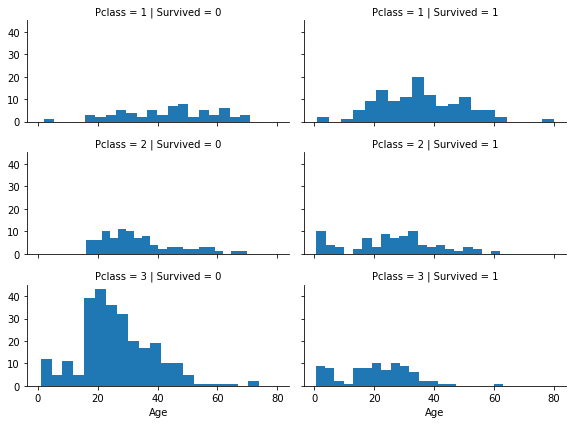

In [24]:
# histogram of age distribuation w.r.t Pclass and survived
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass',height=2, aspect=2)
grid.map(plt.hist, 'Age', bins=20)
grid.add_legend()

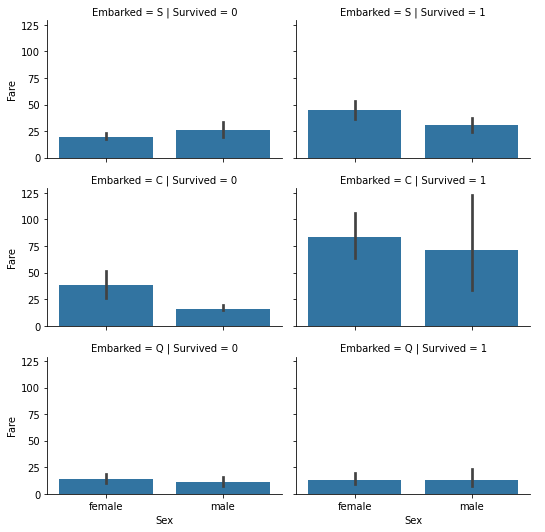

In [25]:
# barplot of Fare w.r.t Gender and survived
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', height=2.5, aspect=1.5)
grid.map(sns.barplot, 'Sex', 'Fare')
grid.add_legend()

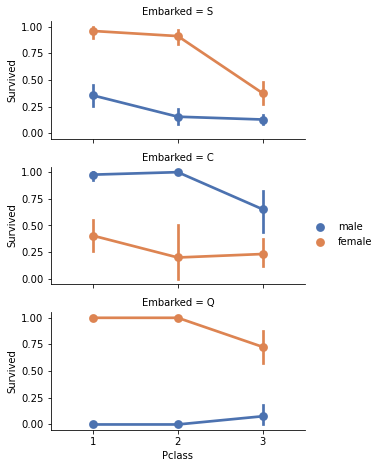

In [26]:
# pointplot of survived w.r.t Pclass and Embarkation port
grid = sns.FacetGrid(train_df, row='Embarked', height=2.2, aspect=2)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

# 4. Wrangling and Preprocessing the data

In [27]:
# dropping useless columns as Name and Passenger ID
# dropping Cabin column as it contains alot of null values
# dropping Ticket column as it contains alot of duplicates values
train_df.drop(['Ticket', 'Cabin','Name','PassengerId'], axis=1,inplace=True)
test_df.drop(['Ticket', 'Cabin','Name','PassengerId'], axis=1,inplace=True)

### 4.1. Sex Column

In [28]:
# encoding the sex column to 0 and 1 values
le = LabelEncoder()
train_df["Sex"] = le.fit_transform(train_df["Sex"])
test_df["Sex"] = le.transform(test_df["Sex"])

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


### 4.2. Age Column

In [29]:
# imputing null values of age with its median value w.r.t Pclass and Sex combination in training and testing data
train_df['Age'] = train_df.groupby(['Pclass','Sex'])['Age'].transform(lambda x: x.fillna(x.median()))
test_df['Age'] = test_df.groupby(['Pclass','Sex'])['Age'].transform(lambda x: x.fillna(x.median()))

### 4.3. Family Size  = SibSp + Parch

In [30]:
# creating new feature is called family size 
# which is the sum of siblings column and parent column in training and testing data
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch']
test_df['FamilySize'] = test_df['SibSp'] + test_df['Parch']

In [31]:
#droping Parch and SibSp columns after creating family size column in training and testing data
train_df.drop(['Parch', 'SibSp'], axis=1,inplace=True)
test_df.drop(['Parch', 'SibSp'], axis=1,inplace=True)

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize
0,0,3,1,22.0,7.2500,S,1
1,1,1,0,38.0,71.2833,C,1
2,1,3,0,26.0,7.9250,S,0
3,1,1,0,35.0,53.1000,S,1
4,0,3,1,35.0,8.0500,S,0


### 4.4. Embarked Column

In [32]:
# imputing the null values of embarked column with the its mode value in training and testing data
train_df['Embarked'] = train_df['Embarked'].fillna(train_df.Embarked.mode())
test_df['Embarked'] = test_df['Embarked'].fillna(test_df.Embarked.mode())

In [33]:
# applying one hot encoding technique on embarked column in training and testing data
train_df = pd.concat([train_df,pd.get_dummies(train_df["Embarked"],drop_first=True)],axis = 1)
test_df = pd.concat([test_df,pd.get_dummies(test_df["Embarked"],drop_first=True)],axis = 1)

In [34]:
# dropping the embarked column in the traing and testing data after encoding it to one hot columns
train_df.drop(['Embarked'], axis=1,inplace=True)
test_df.drop(['Embarked'], axis=1,inplace=True)

train_df.head()

,Survived,Pclass,Sex,Age,Fare,FamilySize,Q,S
0,0,3,1,22.0,7.2500,1,0,1
1,1,1,0,38.0,71.2833,1,0,0
2,1,3,0,26.0,7.9250,0,0,1
3,1,1,0,35.0,53.1000,1,0,1
4,0,3,1,35.0,8.0500,0,0,1


### 4.5. Fare Column

In [35]:
# imputing the null value of Fare column in testing data with its median value
test_df['Fare'].fillna(test_df['Fare'].median(), inplace=True)
test_df.head()

,Pclass,Sex,Age,Fare,FamilySize,Q,S
0,3,1,34.5,7.8292,0,1,0
1,3,0,47.0,7.0000,1,0,1
2,2,1,62.0,9.6875,0,1,0
3,3,1,27.0,8.6625,0,0,1
4,3,0,22.0,12.2875,2,0,1


Ensuring that there is not null values in the training and testing data

In [36]:
print('Percentage of NA Training Values After wrangling the data')
print('--------')
print((train_df.isna().sum()/len(train_df)*100).sort_values(ascending=False))

Percentage of NA Training Values After wrangling the data
--------
Survived      0.0
Pclass        0.0
Sex           0.0
Age           0.0
Fare          0.0
FamilySize    0.0
Q             0.0
S             0.0
dtype: float64


In [37]:
print('Percentage of NA Testing Values After wrangling the data')
print('--------')
print((test_df.isna().sum()/len(test_df)*100).sort_values(ascending=False))

Percentage of NA Testing Values After wrangling the data
--------
Pclass        0.0
Sex           0.0
Age           0.0
Fare          0.0
FamilySize    0.0
Q             0.0
S             0.0
dtype: float64


In [38]:
# printing the shape of train and test data after being preprocessed
print("Training data shape: ",train_df.shape)
print("Testing data shape: ",test_df.shape)

Training data shape:  (891, 8)
Testing data shape:  (418, 7)


# 5. Modeling and Predicting the output

In [39]:
# splitting the features and the labels(survived) columns into X,Y 
X = train_df.drop("Survived", axis=1)
Y = train_df["Survived"]
X_test  = test_df.copy()

In [40]:
# splitting the data into train and validation data
X_train, X_val, Y_train, Y_val = train_test_split(X,Y, test_size=0.2, random_state=42)

In [41]:
# standardizing the data to have zero mean and a standard deviation of 1
std = StandardScaler()
X_train = std.fit_transform(X_train)
X_val = std.transform(X_val)
X_test = std.transform(X_test)

In [42]:
# printing the shape of training and validation data
print("X_train Shape: ",X_train.shape)
print("X_val Shape: ",X_val.shape)
print("Y_train Shape: ",Y_train.shape)
print("Y_val Shape: ",Y_val.shape)

X_train Shape:  (712, 7)
X_val Shape:  (179, 7)
Y_train Shape:  (712,)
Y_val Shape:  (179,)


In [43]:
# here we create abject of different classification models and apply them on the data to get the accuracy of the train and 
#validation data and the f1_score of them

logreg = LogisticRegression(max_iter=3000)  # LogosticRegression
svc = SVC()  # Support victor Machine
knn = KNeighborsClassifier(n_neighbors = 3)  # K-Nearest Neighbour
gaussian = GaussianNB() # Naive Bayes
linear_svc = SVC(kernel='linear') # Linear Support Vector Machine
sgd = SGDClassifier()  # Stochastic Gradient Descent Classifier
decision_tree = DecisionTreeClassifier() # Decision Tree
random_forest = RandomForestClassifier(n_estimators=100)  # Random Forest
# Gradient Boosting Classifier
GBC = GradientBoostingClassifier(min_samples_split=20, min_samples_leaf=60, max_depth=3, max_features=X_train.shape[1])

# putting the models into a list to iterate over them
models = [logreg,svc,knn,gaussian,linear_svc,sgd,decision_tree,random_forest,GBC]
# creating a dictionary with keys of the training and validation accuracy and the training and validation f1_score
Scores = {"Training Accuracy":[],"Training F1_Score":[],"Validation Accuracy":[],"Validation F1_Score":[]}

# iterating over the list of models
for model in models:
    #training the model
    model.fit(X_train,Y_train)
    
    # predicting and evaluating training data
    y_pred_train = model.predict(X_train) # predicting the X_train
    acc_train = round(model.score(X_train, Y_train) * 100, 2) # calculating the accuracy of training data
    Scores["Training Accuracy"].append(acc_train) # appending the training accuracy into the dictionary
    f1_score_train = round(f1_score(Y_train,y_pred_train)*100, 2)  # calculating the f1_score of training data
    Scores["Training F1_Score"].append(f1_score_train)  # appending the training f1_score into the dictionary


    # predicting and evaluating validation data 
    y_pred_val = model.predict(X_val)  # predicting the X_val
    acc_val = round(model.score(X_val, Y_val) * 100, 2)  # calculating the accuracy of validation data
    Scores["Validation Accuracy"].append(acc_val)   # appending the validation accuracy into the dictionary
    f1_score_val = round(f1_score(Y_val,y_pred_val)*100, 2)  # calculating the f1_score of validation data
    Scores["Validation F1_Score"].append(f1_score_val)   # appending the training f1_score into the dictionary
    
# converting the dictionary into a dataframe and sorting it by training accurray and validation accuracy
Scores = pd.DataFrame(Scores,index = ['Logistic Regression','Support Vector Machines', 'KNN','Naive Bayes',
    'Linear SVC','Stochastic Gradient Decent','Decision Tree','Random Forest', 
    'Gradient Boosting Classifier']).sort_values(by=['Training Accuracy','Validation Accuracy'],ascending=[False,False])

Scores

,Training Accuracy,Training F1_Score,Validation Accuracy,Validation F1_Score
Random Forest,97.89,97.18,83.80,80.27
Decision Tree,97.89,97.13,79.33,75.50
KNN,86.10,80.85,78.77,73.97
Gradient Boosting Classifier,84.97,77.75,81.56,75.91
Support Vector Machines,83.85,74.84,81.01,74.63
Naive Bayes,80.34,73.28,77.65,72.97
Logistic Regression,80.06,72.05,81.56,76.60
Linear SVC,78.79,70.57,78.21,72.73
Stochastic Gradient Decent,76.83,65.55,73.18,66.20


Training on the best model we get which is the random forest to predict the output of the test data 

In [44]:
best_model = RandomForestClassifier(n_estimators=100)
best_model.fit(X_train,Y_train)
Y_pred_test = best_model.predict(X_test)

In [45]:
# putting the predictions in the submission file
test_data = pd.read_csv("test.csv")
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': Y_pred_test})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
